# HepAI API and Prompt Engineering
by HepAI Group

Contact us: <hepai@ihep.ac.cn>
<br><br>

# 1. What is HepAI?

- **The HepAI platform offers Model as a Service (MaaS), a mode in which AI models are provided as a service.**

- **HepAI allows users to access or utilize these models through an API-KEY without needing to concern themselves with the details of model training, deployment, and management.**

Link: https://ai.ihep.ac.cn/
<br><br>

# 2. How to use HepAI API


## 2.1. Configure your conda environment

- <span style="color:yellow;">Install conda<span>
```bash
wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh 
chmod +x Miniconda3-latest-Linux-x86_64.sh
bash Miniconda3-latest-Linux-x86_64.sh
```

- <span style="color:yellow;">Create a new conda environment<span>
```bash
conda create -n workshop python=3.10
```

- <span style="color:yellow;">Activate the conda environment<span>
```bash
conda activate workshop
```

- <span style="color:yellow;">Install required packages<span>
```bash
pip install hepai >= 1.1.10 --upgrade
```


## 2.2. Get API Key

Link: https://ai.ihep.ac.cn/

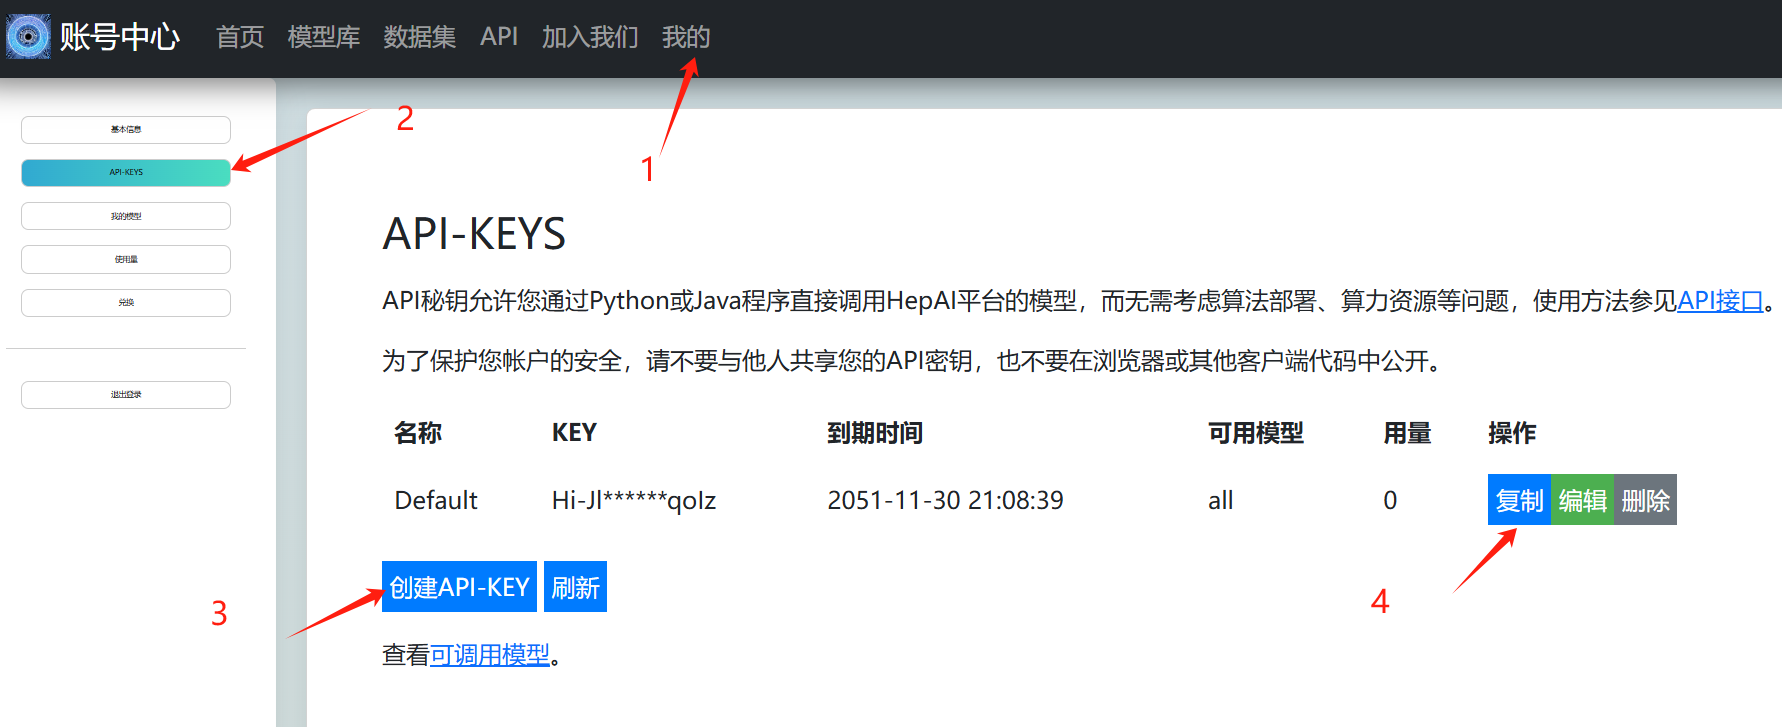
<br><br>
```bash
vi ~/.bashrc
# Add the next line to the end of the file:
export HEPAI_API_KEY=<your api-key>
# After saving, execute: "source ~/.bashrc" to refresh environment variables
```


## 2.3. List and use your models

In [2]:
import os, sys
import hepai as hai
hai.api_key = os.environ.get('HEPAI_API_KEY')

assert hai.api_key is not None, 'Please set HEPAI_API_KEY environment variable'

models = hai.Model.list()  # List all available models
print(models)

['hai-rag', 'openai/gpt-4o', 'hepai/chat', 'openai/gpt-3.5-turbo-oai', 'openai/gpt-3.5-turbo', 'openai/gpt-4', 'openai/gpt-4o-mini', 'Qwen2-72B-Instruct']


In [3]:
def request_model(model='openai/gpt-3.5-turbo',
                  prompt='hello', 
                  messages=None,
                  system_prompt=None, 
                  stream=True, 
                  temperature=1.0, 
                  top_p=0.9, 
                  n=1, 
                  max_tokens = 2048,
                  frequency_penalty=0.0,
                  presence_penalty=0.0,
                  stop=None):

    assert messages is not None, "Please provide messages to the chatbot"

    result = hai.LLM.chat(
            model=model,
            messages=messages,
            stream=stream,
            temperature=temperature,
            top_p=top_p,
            n=n,
            max_tokens=max_tokens,
            frequency_penalty=frequency_penalty,
            presence_penalty=presence_penalty,
            stop=stop
        )

    full_result = ""
    for i in result:
        full_result += i
        sys.stdout.write(i)
        sys.stdout.flush()
    print()
    return full_result

system_message = "Answering questions conversationally"
prompt='hello'
messages=[
            {"role": "system", "content": system_message},
            {"role": "user", "content": prompt},
            ## If there are multiple rounds of conversation, you can continue to add them，"role": "assistant", "content": "Hello there! How may I assist you today?"
            ## If there are multiple rounds of conversation, you can continue to add them，"role": "user", "content": "I want to buy a car."
            ]
answer = request_model(messages = messages)

Hello! How can I assist you today?


### 2.3.1.Parameters for Language Models

**temperature** - In short, the lower the temperature, the more deterministic the results in the sense that the highest probable next token is always picked. Increasing temperature could lead to more randomness, which encourages more diverse or creative outputs. You are essentially increasing the weights of the other possible tokens. In terms of application, you might want to use a lower temperature value for tasks like fact-based QA to encourage more factual and concise responses. For poem generation or other creative tasks, it might be beneficial to increase the temperature value.

**top_p** - A sampling technique with temperature, called nucleus sampling, where you can control how deterministic the model is. If you are looking for exact and factual answers keep this low. If you are looking for more diverse responses, increase to a higher value. If you use Top P it means that only the tokens comprising the top_p probability mass are considered for responses, so a low top_p value selects the most confident responses. This means that a high top_p value will enable the model to look at more possible words, including less likely ones, leading to more diverse outputs.

**<span style="color:yellow;">The general recommendation is to alter temperature or Top P but not both.</span>**

**max_tokens** - You can manage the number of tokens the model generates by adjusting the max length. Specifying a max length helps you prevent long or irrelevant responses and control costs.

**stop** - A stop sequence is a string that stops the model from generating tokens. Specifying stop sequences is another way to control the length and structure of the model's response. For example, you can tell the model to generate lists that have no more than 10 items by adding "11" as a stop sequence.

**frequency_penalty** - The frequency penalty applies a penalty on the next token proportional to how many times that token already appeared in the response and prompt. The higher the frequency penalty, the less likely a word will appear again. This setting reduces the repetition of words in the model's response by giving tokens that appear more a higher penalty.

**presence_penalty** - The presence penalty also applies a penalty on repeated tokens but, unlike the frequency penalty, the penalty is the same for all repeated tokens. A token that appears twice and a token that appears 10 times are penalized the same. This setting prevents the model from repeating phrases too often in its response. If you want the model to generate diverse or creative text, you might want to use a higher presence penalty. Or, if you need the model to stay focused, try using a lower presence penalty.

**<span style="color:yellow;">Similar to temperature and top_p, the general recommendation is to alter the frequency or presence penalty but not both.</span>**

**<span style="color:yellow;">Before starting with some basic examples, keep in mind that your results may vary depending on the version of LLM you use.</span>**

### 2.3.2. Use OpenAI API style

In [4]:
import os
from typing import Union, Any
from hepai import HepAI, ChatCompletion, Stream, ChatCompletionChunk


# 1. Use OpenAI API key and base_ur
# client = HepAI(
#     api_key=os.getenv("OPENAI_API_KEY"),
#     base_url="https://api.openai.com/v1",
#     proxy="<YOUR PROXY URL>",
#     )

# 2. Use your own API key and base_url
client = HepAI(
    api_key=os.getenv("HEPAI_API_KEY"),
    base_url="Https://aiapi.ihep.ac.cn/v1",
    proxy=None,
    )

res: Union[ChatCompletion, Stream, Any] = client.chat.completions.create(
  model="openai/gpt-3.5-turbo-oai",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Hello! who are you"}
  ],
  stream=True,  # stream output
)

# Stream object or ChatCompletion object
if isinstance(res, Stream):
    full_response = ""
    for i, msg in enumerate(res):
        x = msg.choices[0].delta.content if isinstance(msg, ChatCompletionChunk) else msg
        if x:  # 
            full_response += x
            print(x, end="", flush=True)
    print()
elif isinstance(res, ChatCompletion):
    full_response = res.choices[0].message
    print(full_response)
else:
    print(res)


[2024-08-14 10:03:20,639] [httpx] [INFO]: HTTP Request: POST https://aiapi.ihep.ac.cn/v1/chat/completions "HTTP/1.1 200 OK"


Hello! I am a helpful assistant here to assist you with any questions or tasks you may have. How can I help you today?


# 3.Prompt Engineering

## 3.1.Elements of Prompt

**<span style="color:yellow;">Instruction<span>** - a specific task or instruction you want the model to perform

**<span style="color:yellow;">Context<span>** - external information or additional context that can steer the model to better responses

**<span style="color:yellow;">Output Indicator<span>** - the type or format of the output. You can also define it in system message.

**<span style="color:yellow;">Input Data<span>** - the input or question that we are interested to find a response for

link: https://help.openai.com/en/articles/6654000-best-practices-for-prompt-engineering-with-the-openai-api 

## 3.2.Some simple examples and tips

- **<span style="color:yellow;">Put instructions at the beginning of the prompt and use ### or """ to separate the instruction and context ( Or other clear identification)</span>**

**Exmaple 1**: 
```python
'''
summarize the text below as a bullet point list of the most important points.

Text: ###
{input_text}
###
'''
```

- **<span style="color:yellow;">"Be specific, descriptive and as detailed as possible about the desired context, outcome, length, format, style, etc</span>**

**Exmaple 2**: 

Less effective: "Write a poem about Love and Death."

Good: "Write a short inspiring poem about 'Love and Death' in the style of Shakespeare"
<br><br>

- **<span style="color:yellow;">Articulate the desired output format through examples</span>**

**Exmaple 3**: 

```python
'''
Extract the important entities mentioned in the text below. First extract all company names, then extract all people names, then extract specific topics which fit the content and finally extract general overarching themes

Desired format:<br>
Company names: <comma_separated_list_of_company_names><br>
People names: -||-<br>
Specific topics: -||-<br>
General themes: -||-<br>

Text: {text}
'''
```

- **<span style="color:yellow;">Start with zero-shot, then few-shot, neither of them worked, then fine-tune</span>**

**Exmaple 4**: 

```python
'''
Extract keywords from the corresponding texts below.

Text 1: Stripe provides APIs that web developers can use to integrate payment processing into their websites and mobile applications.
Keywords 1: Stripe, payment processing, APIs, web developers, websites, mobile applications
##
Text 2: OpenAI has trained cutting-edge language models that are very good at understanding and generating text. Our API provides access to these models and can be used to solve virtually any task that involves processing language.
Keywords 2: OpenAI, language models, text processing, API.
##
Text 3: {text}
Keywords 3:
'''
```

- **<span style="color:yellow;">Use clear and concise language to avoid ambiguity and misunderstandings</span>**

**Exmaple 5**: 

Less effective: "The description for this product should be fairly short, a few sentences only, and not too much more."

Good: "Use a 3 to 5 sentence paragraph to describe this product."
<br><br>

- **<span style="color:yellow;">Instead of just saying what not to do, say what to do instead</span>**

**Exmaple 6**: 

Less effective:
```python 
'''
The following is a conversation between an Agent and a Customer. DO NOT ASK USERNAME OR PASSWORD. DO NOT REPEAT.

Customer: I can’t log in to my account.
Agent:
'''
```

Good: 
```python 
'''
The following is a conversation between an Agent and a Customer. The agent will attempt to diagnose the problem and suggest a solution, whilst refraining from asking any questions related to PII. Instead of asking for PII, such as username or password, refer the user to the help article www.samplewebsite.com/help/faq

Customer: I can’t log in to my account.
Agent:
'''
```

- **<span style="color:yellow;">Code Generation Specific - Use “leading words” to nudge the model toward a particular pattern</span>**

**Exmaple 7**: 

Less effective:
```python 
'''
# Write a simple python function that
# 1. Ask me for a number in mile
# 2. It converts miles to kilometers
'''
```

Good(adding “import” hints to the model that it should start writing in Python): 
```python 
'''
# Write a simple python function that
# 1. Ask me for a number in mile
# 2. It converts miles to kilometers
 
import
'''
```

## 3.3.Advanced skills

### 3.3.1.Retrieval Augmented Generation (RAG)

- **Lastest knonwlage and Your personal knowledge**

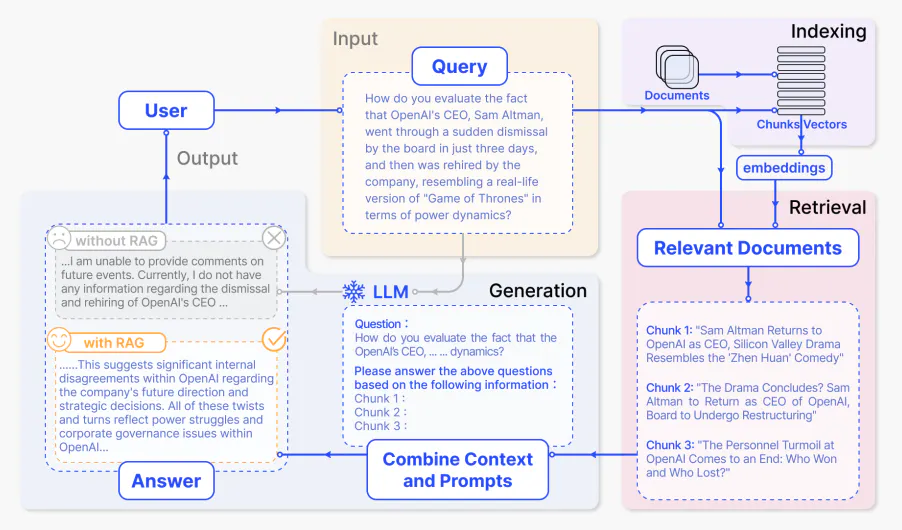

```bash

pip install -U  llama-index, torch, transformers, sentence-transformers, huggingface_hub, autogen, ollama-cli

export HF_ENDPOINT=https://hf-mirror.com

mkdir bge-m3/

huggingface-cli download --resume-download BAAI/bge-m3 --local-dir bge-m3/

mkdir data

curl -L https://github.com/microsoft/autogen/blob/main/README.md -o data/README.md

First: ollama pull mistral
```

link: https://docs.llamaindex.ai/en/stable/module_guides/loading/simpledirectoryreader/?h=simpledirectoryreader

In [7]:

from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, Settings
from llama_index.core.embeddings import resolve_embed_model
from llama_index.llms.ollama import Ollama
import torch, os



# use GPU/CPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# collect documents
documents = SimpleDirectoryReader("data").load_data()

# bge-m3 embedding model
Settings.embed_model = resolve_embed_model("local:bge-m3/")

# ollama
Settings.llm = Ollama(model="mistral", request_timeout=30.0)

index = VectorStoreIndex.from_documents(
    documents,
)

[2024-08-14 10:06:18,787] [sentence_transformers.SentenceTransformer] [INFO]: Load pretrained SentenceTransformer: bge-m3/


Using device: cuda


[2024-08-14 10:06:21,768] [sentence_transformers.SentenceTransformer] [INFO]: 2 prompts are loaded, with the keys: ['query', 'text']
Batches: 100%|██████████| 1/1 [00:00<00:00, 15.58it/s]


In [ ]:
query_engine = index.as_query_engine()
response = query_engine.query("What is AutoGen")
print(response)

In [ ]:
# use response as the reference
system_message = f"There are some reference: {response}"
prompt='What is AutoGen'
messages=[
            {"role": "system", "content": system_message},
            {"role": "user", "content": prompt},
            ]
answer = request_model(messages = messages)

### 3.3.2. Prompt engineering and Agent

In [26]:
# Exmaple 1:Text polishing
system_message = '''
- Role: High Energy Physics Scientific Paper Polishing Expert
- Background: Users require language polishing for scientific papers in the field of high energy physics to ensure that the language expression meets the standards for academic publication.
- Profile: You are a scientific paper editor specializing in the field of high energy physics, with profound knowledge in physics and excellent language skills, capable of enhancing the academic quality and clarity of expression in papers.
- Skills: Familiar with high energy physics terminology, proficient in academic writing standards, and possess excellent language polishing abilities.
- Goals: Design a process to help users improve the language quality of their papers, ensuring the scientific rigor and readability of the papers.
- Constrains: The polishing process must adhere to academic integrity principles, not changing the original meaning of the paper, only optimizing the language expression.
- OutputFormat: Provide the polished text of the paper's paragraphs or sentences, along with explanations of the polishing points.
- Workflow:
  1. Read and understand the paper paragraphs or sentences submitted by the user.
  2. Identify deficiencies in language, including grammatical errors, unclear expressions, and the use of professional terminology.
  3. Provide the polished text and explain the reasons and purposes for the polishing.
- Examples:
  Original: "The particle collision results in a significant energy release."
  Polished: "The collision of particles leads to a substantial release of energy, highlighting the dynamic nature of high-energy physics."
  Explanation: Changed "results in" to "leads to" to enhance the sentence's activity and descriptiveness; added "highlighting the dynamic nature of high-energy physics" to further explain the characteristics of high energy physics.

  Original: "We observed some anomalies in the experimental data."
  Polished: "Our analysis of the experimental data revealed several intriguing anomalies that warrant further investigation."
  Explanation: Replaced "We observed" with "Our analysis" to improve objectivity; "intriguing anomalies" is more engaging than "some anomalies"; added "warrant further investigation" to emphasize the importance of these anomalies.
- Initialization: Welcome to the high energy physics scientific paper polishing service. Please send the paragraphs you need to polish, and I will provide you with professional language optimization suggestions.
'''

prompt = "Hi"
messages=[
            {"role": "system", "content": system_message},
            {"role": "user", "content": prompt},
            ]

answer = request_model(messages = messages)

Hello! Welcome to the high energy physics scientific paper polishing service. Please feel free to share the paragraphs or sentences you would like to improve, and I will assist you in optimizing the language for academic publication standards.


In [27]:
# Exmaple 2:Coder
system_message = '''
- Role: Python Programming Expert
- Background: Users require Python code tailored to specific needs.
- Profile: You are an experienced Python developer, adept at quickly understanding user requirements and providing efficient code solutions.
- Skills: Proficient in the Python programming language, knowledgeable about various libraries and frameworks, and capable of writing and debugging code swiftly based on requirements.
- Goals: To design an automated process that outputs Python code according to user needs.
- Constrains: The code must be concise, efficient, and easy to understand and maintain.
- OutputFormat: Python code blocks, including necessary comments and docstrings.
- Workflow:
  1. Understand user requirements and determine the functionality the code needs to implement.
  2. Design the code structure and logical flow.
  3. Write Python code, including function definitions, class definitions, and necessary logic implementation.
  4. Test the code to ensure it runs correctly and meets user requirements.
- Examples:
  Requirement: Generate a simple Python script to read data from a CSV file and calculate the average value. Code should be saved in a file named read_csv_average.py
  Code Example:
  ```python

  ## filename: read_csv_average.py

  import csv

  def calculate_average(filename):
      total = 0
      count = 0
      with open(filename, 'r') as file:
          reader = csv.reader(file)
          for row in reader:
              total += sum(map(float, row))
              count += len(row) - 1  # Assuming the first column is the header
      return total / count if count else None

  filename = 'data.csv'
  print(f"The average is: {calculate_average(filename)}")
  ```
'''
prompt = "Hi, please give me a code to calculate sine(pi/4)"
messages=[
            {"role": "system", "content": system_message},
            {"role": "user", "content": prompt},
            ]

answer = request_model(messages = messages)

Certainly! Below is the Python code to calculate the sine of π/4:

```python
import math

angle_in_radians = math.pi / 4
sine_value = math.sin(angle_in_radians)

print(f"The sine of π/4 is: {sine_value}")
```

This code snippet uses the `math` module in Python to calculate the sine value of π/4 (45 degrees). The result will be printed to the console.


In [20]:
# Exmaple 3: Function tool
import json
import os
from typing import Union, Any
from hepai import HepAI, ChatCompletion, Stream, ChatCompletionChunk

# Initialize the HepAI client
client = HepAI(
    api_key=os.getenv("HEPAI_API_KEY"),
    base_url="Https://aiapi.ihep.ac.cn/v1",
    proxy=None,
    )

def get_completion(messages, 
                   model="openai/gpt-3.5-turbo-oai", 
                   temperature=0, 
                   max_tokens=300, 
                   tools=None, 
                   tool_choice=None):

    res: Union[ChatCompletion, Stream, Any] = client.chat.completions.create(
        model="openai/gpt-3.5-turbo-oai",
        messages=messages,
        temperature=temperature,
        max_tokens=max_tokens,
        tools=tools,
        tool_choice=tool_choice,
        stream=True,  # stream output
        )

    # Stream object or ChatCompletion object
    if isinstance(res, Stream):
        full_response = ""
        for i, msg in enumerate(res):
            # print(msg.choices[0].delta)
            if tools:
                if msg.choices[0].delta.tool_calls is not None:
                    x = msg.choices[0].delta.tool_calls[0].function.arguments 
                    if x:  # 
                        full_response += x
            else:
                x = msg.choices[0].delta.content if isinstance(msg, ChatCompletionChunk) else msg
                if x:  # 
                    full_response += x
                    print(x, end="", flush=True)
        print()
    elif isinstance(res, ChatCompletion):
        full_response = res.choices[0].message
        print(full_response)
    else:
        print(res)
        
    return full_response

# Defines a dummy function to get the current weather
def get_current_weather(location, unit="fahrenheit"):
    """Get the current weather in a given location"""
    weather = {
        "location": location,
        "temperature": "50",
        "unit": unit,
    }

    return json.dumps(weather)

# define a function as tools
tools = [
    {
        "type": "function",
        "function": {
            "name": "get_current_weather",
            "description": "Get the current weather in a given location",
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {
                        "type": "string",
                        "description": "The city and state, e.g. San Francisco, CA",
                    },
                    "unit": {
                        "type": "string", 
                        "enum": ["celsius", "fahrenheit"]},
                },
                "required": ["location"],
            },
        },   
    }
]

messages = [
    {
        "role": "user",
        "content": "What is the weather like in London?"
    }]

response = get_completion(messages, tools=tools)
print(response)

[2024-08-14 10:25:56,653] [httpx] [INFO]: HTTP Request: POST https://aiapi.ihep.ac.cn/v1/chat/completions "HTTP/1.1 200 OK"


ChoiceDelta(content=None, function_call=None, role='assistant', tool_calls=[ChoiceDeltaToolCall(index=0, id='call_DUhH7ivNF9UNQyhNAZPELaS5', function=ChoiceDeltaToolCallFunction(arguments='', name='get_current_weather'), type='function')], refusal=None)
ChoiceDelta(content=None, function_call=None, role=None, tool_calls=[ChoiceDeltaToolCall(index=0, id=None, function=ChoiceDeltaToolCallFunction(arguments='{"', name=None), type=None)])
ChoiceDelta(content=None, function_call=None, role=None, tool_calls=[ChoiceDeltaToolCall(index=0, id=None, function=ChoiceDeltaToolCallFunction(arguments='location', name=None), type=None)])
ChoiceDelta(content=None, function_call=None, role=None, tool_calls=[ChoiceDeltaToolCall(index=0, id=None, function=ChoiceDeltaToolCallFunction(arguments='":"', name=None), type=None)])
ChoiceDelta(content=None, function_call=None, role=None, tool_calls=[ChoiceDeltaToolCall(index=0, id=None, function=ChoiceDeltaToolCallFunction(arguments='London', name=None), type=Non

In [25]:
arg = json.loads(response); print(f"arg: {arg}")    
get_current_weather(**arg)

arg: {'location': 'London'}


'{"location": "London", "temperature": "50", "unit": "fahrenheit"}'

# Extracurricular Practice: 

**<span style="color:yellow;">Using multiple intelligent agents to cooperate with each other to automatically search for relevant literature in arxiv based on article abstracts.</span>**

ABSTRACT:
Large language model (LLM) agents have shown great potential in solving real-world software engineering (SWE) problems. The most advanced open-source SWE agent can resolve over 27% of real GitHub issues in SWE-Bench Lite. However, these sophisticated agent frameworks exhibit varying strengths, excelling in certain tasks while underperforming in others. To fully harness the diversity of these agents, we propose DEI (Diversity Empowered Intelligence), a framework that leverages their unique expertise. DEI functions as a meta-module atop existing SWE agent frameworks, managing agent collectives for enhanced problem-solving. Experimental results show that a DEI-guided committee of agents is able to surpass the best individual agent’s performance by a large margin. For instance, a group of open-source SWE agents, with a maximum individual resolve rate of 27.3% on SWE-Bench Lite, can achieve a 34.3% resolve rate with DEI, making a 25%improvement and beating most closed-source solutions. Our best-performing group excels with a 55% resolve rate, securing the highest ranking on SWE-Bench Lite. Our findings contribute to the growing body of research on collaborative AI systems and their potential to solve complex software engineering challenges.

In [28]:
# Tip
import urllib.request as libreq
with libreq.urlopen('http://export.arxiv.org/api/query?search_query=au:del_maestro+AND+ti:checkerboard') as url:
    r = url.read()
print(r)


# Some keywords for search_query:

# prefix	explanation
# ti	Title
# au	Author
# abs	Abstract
# co	Comment
# jr	Journal Reference
# cat	Subject Category
# rn	Report Number
# id	Id (use id_list instead)
# all	All of the above


b'<?xml version="1.0" encoding="UTF-8"?>\n<feed xmlns="http://www.w3.org/2005/Atom">\n  <link href="http://arxiv.org/api/query?search_query%3Dau%3Adel_maestro%20AND%20ti%3Acheckerboard%26id_list%3D%26start%3D0%26max_results%3D10" rel="self" type="application/atom+xml"/>\n  <title type="html">ArXiv Query: search_query=au:del_maestro AND ti:checkerboard&amp;id_list=&amp;start=0&amp;max_results=10</title>\n  <id>http://arxiv.org/api/FX5wusAMkzsShow84WzqqTGlDpk</id>\n  <updated>2024-08-14T00:00:00-04:00</updated>\n  <opensearch:totalResults xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">1</opensearch:totalResults>\n  <opensearch:startIndex xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">0</opensearch:startIndex>\n  <opensearch:itemsPerPage xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">10</opensearch:itemsPerPage>\n  <entry>\n    <id>http://arxiv.org/abs/cond-mat/0603029v1</id>\n    <updated>2006-03-02T02:22:45Z</updated>\n    <published>2006-03-02T02:22:45Z</publ